In [1]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=2)

dist_l1 <- function(a,b) {
    sum( abs(a-b) )
}
dist_l2 <- function(a,b) {
    sqrt( sum( (a-b)^2 ) )
}
dist_cos <- function(a,b) {
    sum(a*b) / (sqrt(sum(a^2)) * sqrt(sum(b^2)))
}

# Problema 1

In [2]:
k <- 3
q <- data.frame(X=2, Y=14)
df <- data.frame(
    row.names = c('P1', 'P2', 'P3', 'P4', 'P5'),
    X = c(5,1,3,8,11),
    Y = c(8,7,12,5,4)
)
df$dist_l2 = apply(df, 1, function(v) {dist_l2(v,q)})
df$dist_cos = apply(df, 1, function(v) {dist_cos(v,q)})

print("Distancia L2")
df[ order(df$dist_l2)[1:k], c('X', 'Y', 'dist_l2')]
print("Similaridade do Cosseno")
df[ order(df$dist_cos, decreasing = T)[1:k], c('X', 'Y', 'dist_cos')]

[1] "Distancia L2"


,X,Y,dist_l2
P3,3,12,2.236068
P1,5,8,6.708204
P2,1,7,7.071068


[1] "Similaridade do Cosseno"


,X,Y,dist_cos
P3,3,12,0.9788265
P1,5,8,0.7452336
P2,1,7,0.7071068


# Problema 2

In [3]:
A <- matrix(c(
    0,0,1,2,4,
    0,0,3,2,4,
    3,3,1,0,1,
    3,1,4,2,1,
    3,4,4,2,2),
    nrow=5, byrow=T)
B <- matrix(c(
    1,1,2,3,
    4,1,1,4,
    3,4,4,2,
    2,1,2,0,
    0,4,3,2,
    0,0,4,3,3),
    nrow=5, byrow=T)
C <- matrix(c(
    3,3,1,0,0,
    3,3,1,0,0,
    3,2,2,0,0,
    2,2,2,0,0,
    1,1,1,0,0),
    nrow=5, byrow=T)
D <- matrix(c(
    4,4,2,0,1,
    4,4,2,0,1,
    4,3,3,1,1,
    3,3,3,0,1,
    2,2,2,0,0),
    nrow=5, byrow=T)

hist <- function(data) {
    sapply(X=0:4, function(x) { sum(data==x) } )
}
histograms <- list(A=hist(A), B=hist(B), C=hist(C), D=hist(D))
print("Histograms")
histograms

dist_matrix <- matrix(ncol=4, nrow=4)
for (i in 1:4) {
    for (j in 1:4) {
        if (i != j) {
            dist_matrix[i,j] <- dist_l1(histograms[[i]], histograms[[j]])
        }
    }        
}
print("Distances")
dist_matrix

[1] "Histograms"


$A
[1] 5 5 5 5 5

$B
[1] 4 5 5 5 6

$C
[1] 10  5  5  5  0

$D
[1] 5 5 5 5 5

[1] "Distances"


NA,2,10,0
2,NA,12,2
10,12,NA,10
0,2,10,NA


As imagens mais similares são A e D, que possuem exatamente o mesmo histograma

# Problema 3

- O melhor método é o Inception-V1, pois este está no topo do gráfico Precision X Recall na maior parte do intervalo, isto é, retorna mais documentos relevantes entre os k primeiros resultados para a maioria dos valores de k.
- O Pior método é o CNN, pois apesar de um bom desempenho no inicio da pesquisa, ele domina a parte inferior do gráfico por quase todo o intervalo, isto é, retorna menos documentos relevantes entre os primeiros resultados.

# Problema 4

In [4]:
# Fazendo a contagem de termos manualmente, por preguiça
tf <- data.frame(
    row.names = c('D1', 'D2', 'D3', 'D4'),
    t1 = c(2,0,1,0),
    t2 = c(1, 1, 1, 1),
    t3 = c(0,2,0,4),
    t4 = c(0,1,3,1)
)
print("TF")
tf


idf = list()
for ( feature in c('t1', 't2', 't3', 't4') ) {
  idf[[feature]] = log(nrow(tf) / sum(tf[[feature]] > 0))
}
print("IDF")
idf

tf_idf <- data.frame(
    row.names = row.names(tf),
    t1 = tf$t1 * idf$t1,
    t2 = tf$t2 * idf$t2,
    t3 = tf$t3 * idf$t3,
    t4 = tf$t4 * idf$t4
)
print("TF-IDF")
tf_idf

[1] "TF"


,t1,t2,t3,t4
D1,2,1,0,0
D2,0,1,2,1
D3,1,1,0,3
D4,0,1,4,1


[1] "IDF"


$t1
[1] 0.6931472

$t2
[1] 0

$t3
[1] 0.6931472

$t4
[1] 0.2876821

[1] "TF-IDF"


,t1,t2,t3,t4
D1,1.3862944,0,0.000000,0.0000000
D2,0.0000000,0,1.386294,0.2876821
D3,0.6931472,0,0.000000,0.8630462
D4,0.0000000,0,2.772589,0.2876821


# Problema 5

[1]   8 227   3 232  47 221  55 219  36 233   8 202

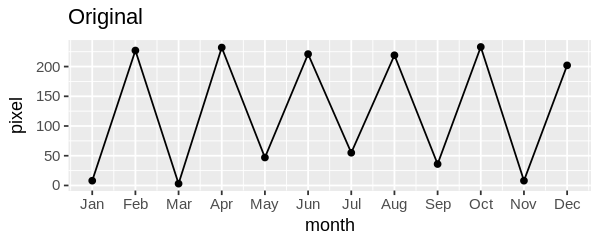

[1] -1.1192841  0.9893027 -1.1674254  1.0374440 -0.7437823  0.9315332
 [7] -0.6667563  0.9122767 -0.8496931  1.0470722 -1.1192841  0.7485965

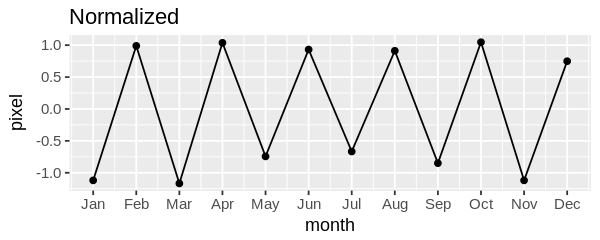

[1] -0.06499069 -0.06499069  0.09387544  0.12276019  0.09868957 -0.18534382

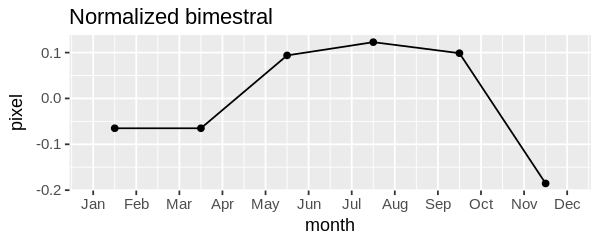

In [11]:
# Pegando menor valor dos meses impares e maior valor dos meses pares:
# Fiz no olho pq copiar esse monte de tabela é um saco, e eu provavelmente iria errar a cópia...
serie <- c(
    8, 227, 3, 232, 
    47, 221, 55, 219,
    36, 233, 8, 202)

serie_norm <- (serie - mean(serie)) / sd(serie)

# PAA coxo 2:1 
serie_norm_paa <- (serie_norm[seq(1, length(serie_norm), 2)] + serie_norm[seq(2, length(serie_norm), 2)] ) / 2

serie_chart <- function(title, pixel, month=1:12) {
    df <- data.frame(x=month, pixel=pixel)
    p <- ggplot(df, aes(x=month, y=pixel))
    p <- p + geom_point()
    p <- p + geom_line()
    p <- p + scale_x_continuous(breaks=1:12, labels=month.abb, limits=c(1, 12))
    p <- p + labs(title = title);
    p
}

serie_chart("Original", serie)
serie
serie_chart("Normalized", serie_norm)
serie_norm
serie_chart("Normalized bimestral", serie_norm_paa, month=seq(1.5, 12.5, 2))
serie_norm_paa